In [2]:
import pandas as pd

In [3]:
pwd

'/Users/glorialim/Cosc 301/project-data-301-project-53'

In [4]:
ls

CODE_OF_CONDUCT.md  Project.ipynb       data/
LICENSE             README.md           images/
PROJECTHen.ipynb    analysis/           presentation/


In [6]:
#This is the file this is being read
df = pd.read_csv("Life expectancy.csv") 
#Did not specify the sep parameter, so this file has comma as delimiters

In [8]:
df.head()

,Entity,Year,Life expectancy
0,Australia,1802,34.049999
1,Australia,1803,34.049999
2,Australia,1804,34.049999
3,Australia,1805,34.049999
4,Australia,1806,34.049999


In [12]:
df.rename(columns={'Entity':'Country'},inplace=True)
df.rename(columns={'Life expectancy':'LifeExp'}, inplace=True)
#Renamed a data column to understand the data better
df

,Country,Year,LifeExp
0,Australia,1802,34.049999
1,Australia,1803,34.049999
2,Australia,1804,34.049999
3,Australia,1805,34.049999
4,Australia,1806,34.049999
...,...,...,...
3248,United States,2012,78.940002
3249,United States,2013,78.959999
3250,United States,2014,78.940002
3251,United States,2015,78.870003


In [13]:
avg=(df.groupby(['Country', 'Year'], as_index=False).mean()
 .groupby('Country')['LifeExp'].mean())
avg
#The average of each countries life expectancy

Country
Australia         54.290000
Brazil            42.392292
Canada            55.778533
China             41.452839
France            53.691717
Germany           52.880939
India             34.292578
Italy             49.226360
Japan             50.345707
Mexico            40.835629
Russia            41.992980
Spain             47.588779
Switzerland       55.246037
United Kingdom    55.591947
United States     54.651060
Name: LifeExp, dtype: float64

In [14]:
df.groupby('Country').LifeExp.transform('mean')

0       54.29000
1       54.29000
2       54.29000
3       54.29000
4       54.29000
          ...   
3248    54.65106
3249    54.65106
3250    54.65106
3251    54.65106
3252    54.65106
Name: LifeExp, Length: 3253, dtype: float64

In [15]:
df['LifeExpAvg']=df.groupby('Country').LifeExp.transform('mean')
df

,Country,Year,LifeExp,LifeExpAvg
0,Australia,1802,34.049999,54.29000
1,Australia,1803,34.049999,54.29000
2,Australia,1804,34.049999,54.29000
3,Australia,1805,34.049999,54.29000
4,Australia,1806,34.049999,54.29000
...,...,...,...,...
3248,United States,2012,78.940002,54.65106
3249,United States,2013,78.959999,54.65106
3250,United States,2014,78.940002,54.65106
3251,United States,2015,78.870003,54.65106


In [16]:
import numpy as np

In [17]:
(
    df.rename(columns={"LifeExp":"LifeExpectancy"})
    .assign(color_filter=lambda x: np.where((x.Year > 1800) & (x.LifeExpectancy > 0), 1, 0))
    .query("LifeExpectancy > 1 and color_filter == 1")
    .sort_values('Country', ascending=False)
    .reset_index(drop=True)
    .loc[:, ['Country', 'LifeExpectancy', 'Year', 'LifeExpAvg']]
)

,Country,LifeExpectancy,Year,LifeExpAvg
0,United States,78.860001,2016,54.65106
1,United States,39.410000,1868,54.65106
2,United States,39.410000,1879,54.65106
3,United States,39.410000,1878,54.65106
4,United States,39.410000,1877,54.65106
...,...,...,...,...
3234,Australia,66.400002,1943,54.29000
3235,Australia,65.879997,1942,54.29000
3236,Australia,66.139999,1941,54.29000
3237,Australia,66.260002,1940,54.29000


In [18]:
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [19]:
pwd

'/Users/glorialim/Cosc 301/project-data-301-project-53'

In [24]:
path = "C:/Users/glorialim/Cosc 301/project-data-301-project-53/Life expectancy.csv"

In [22]:
def load_and_process(path):
    df1 = (
            pd.read_csv(path)
            .rename(columns={"LifeExp":"LifeExpectancy"})
            .dropna()
            .sort_values("Country", ascending=True)
    )
    df2 = (
            df1
            .assign(color_filter=lambda x: np.where((x.Year > 1800) & (x.LifeExpectancy > 0), 1, 0))
    )
    
    return df2

<AxesSubplot:xlabel='Country', ylabel='LifeExpAvg'>

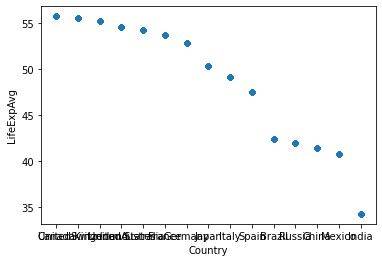

In [39]:
df.plot(kind='scatter', x='Country', y='LifeExpAvg')

[Text(0.5, 1.0, 'Average Life Expectancy Age in 15 Different Countries'),
 Text(0.5, 0, 'Average Life Expectancy Age')]

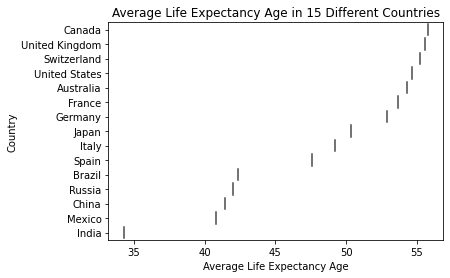

In [34]:
df = df.sort_values(by=["LifeExpAvg"], ascending = False)
types = sns.violinplot(x=df["LifeExpAvg"],y=df["Country"], df=df, scale="width").set(title='Average Life Expectancy Age in 15 Different Countries', xlabel='Average Life Expectancy Age')
types

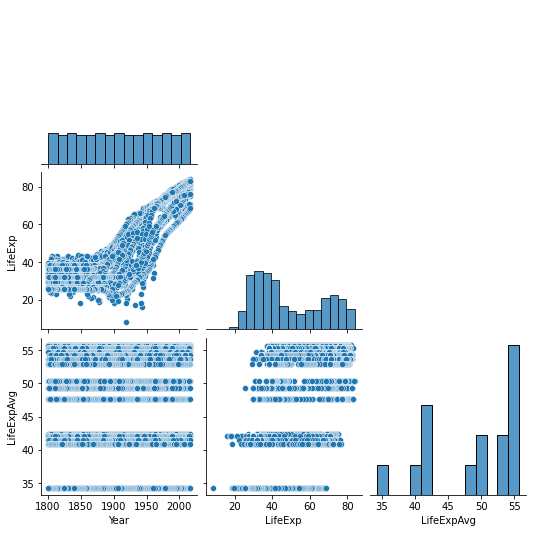

In [31]:
sns.pairplot(data=df,corner=True)

In [ ]:
#TASK 4

#QUESTION -- What can the dataset tell us about the countries well being?

#The dataset tells us that over the years (from 1800 to 2016), the average life expectancy has inreased in all 15 major countries. With that information, we can research and find out the different factors that would contribute to the increase in life expectancy in specific years. According to the pairplot, we can clearly see that over the years the life expectancy is increasing, with a significant slope between the years 1900-1950. Lots of industralizations have occured during those years, and we believe that is one of the reasons why there is a big jump in an increase of life expectancy. 